# SMS SpamDetection

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
dataset=pd.read_csv('spam.csv',encoding='latin1')

In [12]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [14]:
dataset['Spam']=dataset.v1.apply(lambda x:1 if x=='spam' else 0)
dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [15]:
dataset

,v1,v2,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


### Data Analysis

<AxesSubplot:xlabel='Spam', ylabel='count'>

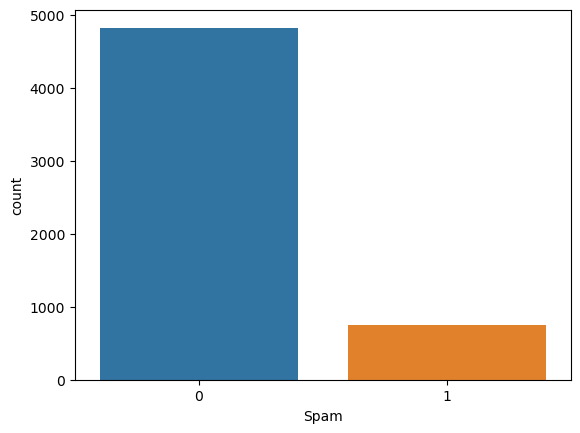

In [17]:
import seaborn as sns
sns.countplot(x=dataset['Spam'])

In [22]:
dataset.describe

<bound method NDFrame.describe of         v1                                                 v2  Spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U dun say so early hor... U c already then say...     0
4      ham  Nah I don't think he goes to usf, he lives aro...     0
...    ...                                                ...   ...
5567  spam  This is the 2nd time we have tried 2 contact u...     1
5568   ham              Will Ì_ b going to esplanade fr home?     0
5569   ham  Pity, * was in mood for that. So...any other s...     0
5570   ham  The guy did some bitching but I acted like i'd...     0
5571   ham                         Rofl. Its true to its name     0

[5572 rows x 3 columns]>

In [23]:
dataset.corr()

,Spam
Spam,1.0


In [24]:
dataset[dataset.Spam==1]

,v1,v2,Spam
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [26]:
dataset.drop('v1',axis='columns',inplace=True)

In [27]:
x=dataset.v2
y=dataset['Spam']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)

In [29]:
X_train.shape

(4179,)

In [53]:
X_test.shape

(1393,)

In [32]:
print(type(X_train.values))
X_train_text = [str(x) for x in X_train.values]

<class 'numpy.ndarray'>


### Count Vectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
V=CountVectorizer()
X_train_count=V.fit_transform(X_train_text)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Modle Evaluation

In [34]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,Y_train)
X_test_count=V.transform(X_test)
model.score(X_test_count,Y_test)

0.9849246231155779

### Using Pipelining

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
X_train_test=[str(x) for x in X_train.values]
clf.fit(X_train_test,Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [36]:
clf.score(X_test,Y_test)

0.9849246231155779

In [39]:
Email=['Hello sir Good Morning','I LOVE YOU DAD and MOM','YOU HAVE WON! As a valued Vodafone customer our computer has picked YOU to win a å£150 prize. To collect is easy. Just call 09061743386 ']
Email_text=V.transform(Email)

In [40]:
model.predict(Email_text)

array([0, 0, 1], dtype=int64)

# PyCaret

I'm about to employ the specialized PyCaret module for this particular dataset, which is a powerful tool designed to enhance our machine learning and data analysis workflow. PyCaret simplifies the process of preparing data, building models, and assessing their performance, making it a valuable resource for our analysis.

In [41]:
from pycaret.classification import *

In [42]:
classificate=setup(data=dataset,target='Spam',session_id=12)

,Description,Value
0,Session id,12
1,Target,Spam
2,Target type,Binary
3,Original data shape,"(5572, 2)"
4,Transformed data shape,"(5572, 2)"
5,Transformed train set shape,"(3900, 2)"
6,Transformed test set shape,"(1672, 2)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


In [43]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8874,0.6147,0.1605,1.0000,0.2740,0.2469,0.3731,2.6920
knn,K Neighbors Classifier,0.8874,0.5802,0.1605,1.0000,0.2740,0.2469,0.3731,0.8470
nb,Naive Bayes,0.8874,0.6147,0.1605,1.0000,0.2740,0.2469,0.3731,0.7660
dt,Decision Tree Classifier,0.8874,0.5802,0.1605,1.0000,0.2740,0.2469,0.3731,0.7440
svm,SVM - Linear Kernel,0.8874,0.0000,0.1605,1.0000,0.2740,0.2469,0.3731,0.8200
ridge,Ridge Classifier,0.8874,0.0000,0.1605,1.0000,0.2740,0.2469,0.3731,0.8300
rf,Random Forest Classifier,0.8874,0.5802,0.1605,1.0000,0.2740,0.2469,0.3731,1.0260
qda,Quadratic Discriminant Analysis,0.8874,0.6147,0.1605,1.0000,0.2740,0.2469,0.3731,1.5240
ada,Ada Boost Classifier,0.8874,0.5802,0.1605,1.0000,0.2740,0.2469,0.3731,0.7570
gbc,Gradient Boosting Classifier,0.8874,0.5817,0.1605,1.0000,0.2740,0.2469,0.3731,0.8440


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [44]:
best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
LogisticRegression=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8872,0.6020,0.1538,1.0000,0.2667,0.2396,0.3690
1,0.8769,0.5794,0.0769,1.0000,0.1429,0.1262,0.2595
2,0.8846,0.6019,0.1346,1.0000,0.2373,0.2124,0.3447
3,0.8872,0.6232,0.1538,1.0000,0.2667,0.2396,0.3690
4,0.9000,0.6605,0.2500,1.0000,0.4000,0.3662,0.4734
5,0.8897,0.6183,0.1731,1.0000,0.2951,0.2662,0.3918
6,0.8821,0.5930,0.1154,1.0000,0.2069,0.1844,0.3187
7,0.8872,0.6145,0.1698,1.0000,0.2903,0.2612,0.3876
8,0.8923,0.6355,0.2075,1.0000,0.3438,0.3116,0.4296


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
tune=tune_model(LogisticRegression)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8872,0.6020,0.1538,1.0000,0.2667,0.2396,0.3690
1,0.8769,0.5794,0.0769,1.0000,0.1429,0.1262,0.2595
2,0.8846,0.6019,0.1346,1.0000,0.2373,0.2124,0.3447
3,0.8872,0.6232,0.1538,1.0000,0.2667,0.2396,0.3690
4,0.9000,0.6605,0.2500,1.0000,0.4000,0.3662,0.4734
5,0.8897,0.6183,0.1731,1.0000,0.2951,0.2662,0.3918
6,0.8821,0.5930,0.1154,1.0000,0.2069,0.1844,0.3187
7,0.8872,0.6145,0.1698,1.0000,0.2903,0.2612,0.3876
8,0.8923,0.6355,0.2075,1.0000,0.3438,0.3116,0.4296


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [48]:
GBC_bagged=ensemble_model(LogisticRegression,method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8872,0.6020,0.1538,1.0000,0.2667,0.2396,0.3690
1,0.8769,0.5794,0.0769,1.0000,0.1429,0.1262,0.2595
2,0.8846,0.6019,0.1346,1.0000,0.2373,0.2124,0.3447
3,0.8872,0.6232,0.1538,1.0000,0.2667,0.2396,0.3690
4,0.9000,0.6605,0.2500,1.0000,0.4000,0.3662,0.4734
5,0.8897,0.6183,0.1731,1.0000,0.2951,0.2662,0.3918
6,0.8821,0.5930,0.1154,1.0000,0.2069,0.1844,0.3187
7,0.8872,0.6145,0.1698,1.0000,0.2903,0.2612,0.3876
8,0.8923,0.6355,0.2075,1.0000,0.3438,0.3116,0.4296


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [49]:
GBC_boosted=ensemble_model(LogisticRegression,method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8667,0.6020,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8667,0.5794,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8667,0.6019,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8667,0.6232,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8667,0.6605,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8667,0.6183,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8667,0.5930,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8641,0.6145,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8641,0.6355,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [50]:
evaluate_model(LogisticRegression)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

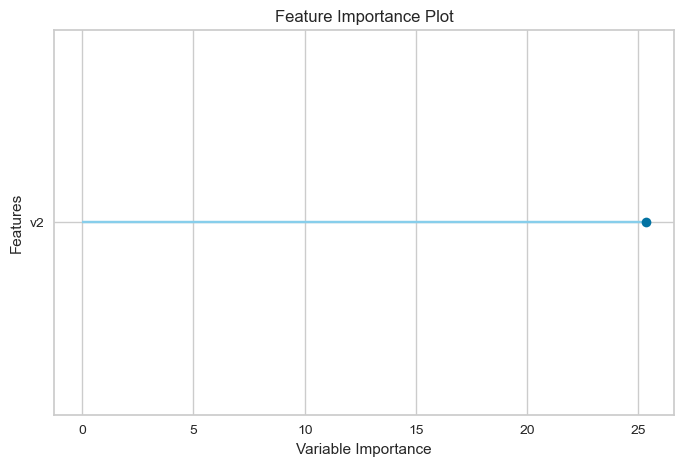

In [51]:
plot_model(LogisticRegression,plot="feature")

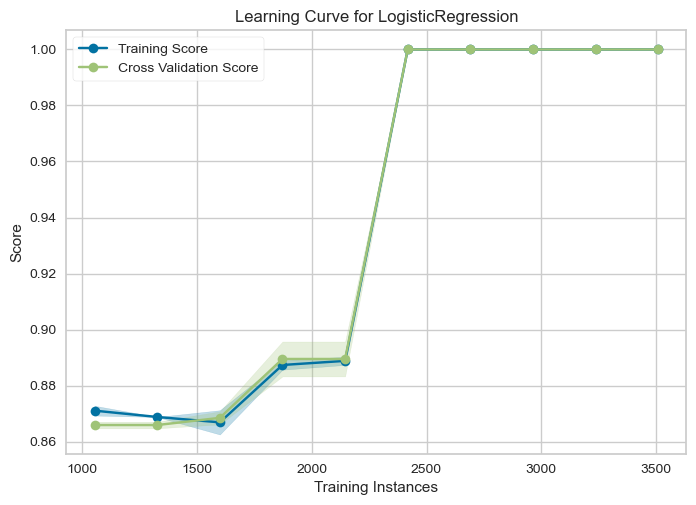

In [52]:
plot_model(LogisticRegression,plot="learning")